Librería aplicable

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Datos

In [82]:
url = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\13.- Análisis exploratorio de Datos (EDA)\Data\AB_NYC_2019.csv\AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Información general

In [83]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [84]:
# Estadísticas descriptivas
df.describe(include='all')

id            name       host_id host_name  \
count   4.889500e+04           48879  4.889500e+04     48874   
unique           NaN           47905           NaN     11452   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       417   
mean    1.901714e+07             NaN  6.762001e+07       NaN   
std     1.098311e+07             NaN  7.861097e+07       NaN   
min     2.539000e+03             NaN  2.438000e+03       NaN   
25%     9.471945e+06             NaN  7.822033e+06       NaN   
50%     1.967728e+07             NaN  3.079382e+07       NaN   
75%     2.915218e+07             NaN  1.074344e+08       NaN   
max     3.648724e+07             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48895         48895  48895.000000  48895.000000   
unique                   5           221           NaN           NaN   
top              Manhattan  Williamsburg           NaN           NaN   
freq                 21661          3920           NaN           NaN   
mean                   NaN           NaN     40.728949    -73.952170   
std                    NaN           NaN      0.054530      0.046157   
min                    NaN           NaN     40.499790    -74.244420   
25%                    NaN           NaN     40.690100    -73.983070   
50%                    NaN           NaN     40.723070    -73.955680   
75%                    NaN           NaN     40.763115    -73.936275   
max                    NaN           NaN     40.913060    -73.712990   

              room_type         price  minimum_nights  number_of_reviews  \
count             48895  48895.000000    48895.000000       48895.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              25409           NaN             NaN                NaN   
mean                NaN    152.720687        7.029962          23.274466   
std                 NaN    240.154170       20.510550          44.550582   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          24.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        38843       38843.000000                    48895.000000   
unique        1764                NaN                             NaN   
top     2019-06-23                NaN                             NaN   
freq          1413                NaN                             NaN   
mean           NaN           1.373221                        7.143982   
std            NaN           1.680442                       32.952519   
min            NaN           0.010000                        1.000000   
25%            NaN           0.190000                        1.000000   
50%            NaN           0.720000                        1.000000   
75%            NaN           2.020000                        2.000000   
max            NaN          58.500000                      327.000000   

        availability_365  
count       48895.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean          112.781327  
std           131.622289  
min             0.000000  
25%             0.000000  
50%            45.000000  
75%           227.000000  
max           365.000000

Limpieza de datos

Manejo de valores nulos

In [85]:
# Convertir la columna a tipo datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Calcular la mediana de fechas
median_date = df['last_review'].median()

# Reemplazar los valores nulos con la mediana
df['last_review'].fillna(median_date, inplace=True)

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_18212\3033828420.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna(median_date, inplace=True)


Eliminación de Columnas irrelevantes

In [86]:
# Eliminar columnas que no aportan valor al análisis
df.drop(columns=['name', 'host_name'], inplace=True)


# Análisis estadístico

## Variables numéricas

In [87]:
# Estadísticas descriptivas para variables numéricas
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   

       minimum_nights  number_of_reviews                    last_review  \
count    48895.000000       48895.000000                          48895   
mean         7.029962          23.274466  2018-11-19 17:26:25.119133184   
min          1.000000           0.000000            2011-03-28 00:00:00   
25%          1.000000           1.000000            2018-11-04 00:00:00   
50%          3.000000           5.000000            2019-05-19 00:00:00   
75%          5.000000          24.000000            2019-06-19 00:00:00   
max       1250.000000         629.000000            2019-07-08 00:00:00   
std         20.510550          44.550582                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       38843.000000                    48895.000000      48895.000000  
mean            1.373221                        7.143982        112.781327  
min             0.010000                        1.000000          0.000000  
25%             0.190000                        1.000000          0.000000  
50%             0.720000                        1.000000         45.000000  
75%             2.020000                        2.000000        227.000000  
max            58.500000                      327.000000        365.000000  
std             1.680442                       32.952519        131.622289

## Variables categóricas

In [88]:
# Frecuencia de valores en variables categóricas
df['neighbourhood_group'].value_counts()
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

## Visualización de Datos

### Distribución de precios

1.- Planteamiento del problema y recopilación de datos

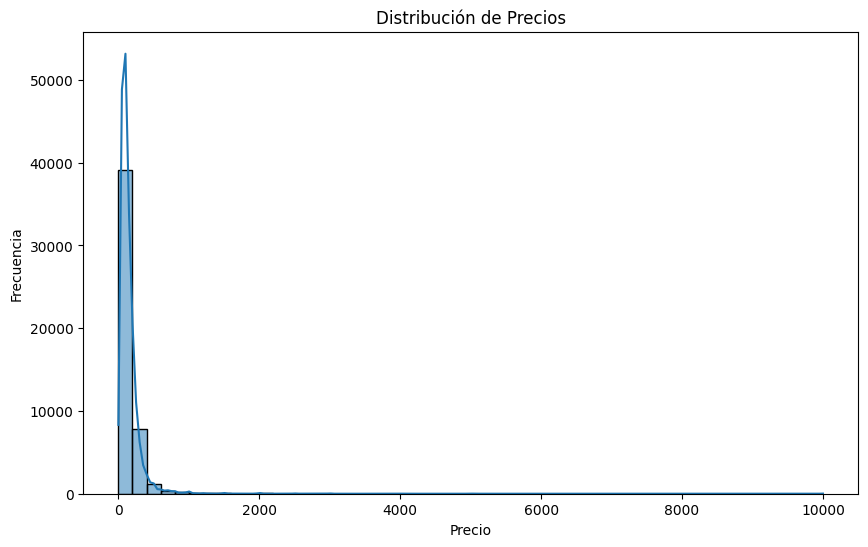

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

La Distribución de precios muestra una tendencia positiva, la mayoría de los precios son bajos y asequibles, con algunas excepciones bastante más altas.

### Relación entre precio y número de reseñas

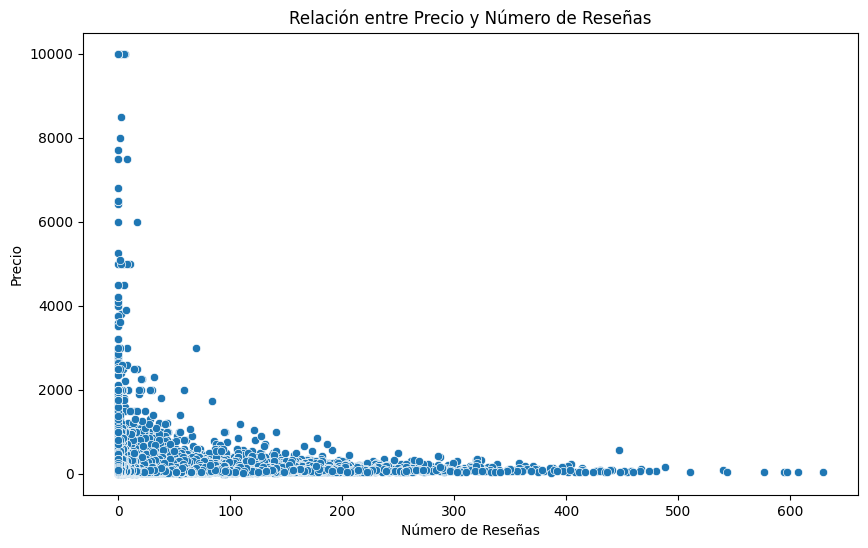

In [90]:
# Gráfico de dispersión entre precio y número de reseñas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')
plt.show()

Se observa una correlación positiva entre el número de reseñas y el precio, lo que sugiere que los Airbnb's con costo más elevado, son más consultados, por lo que reciben más reseñas.

### Mapa de calor de precios por vecindario

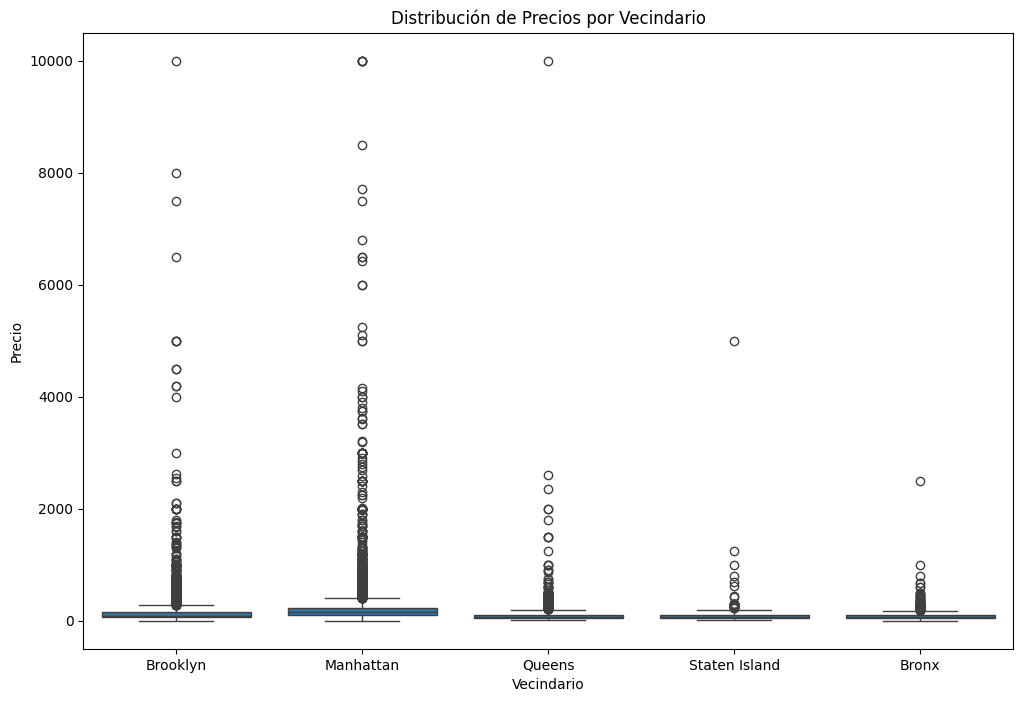

In [91]:
# Mapa de calor de precios por vecindario
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Distribución de Precios por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.show()

Manhattan presenta una mayor variabilidad en los precios, con algunos Airbnb's con precios muy elevados, denotando a su vez que Queens, Staten Island y Bronx contrastan con una constancia más elevada en precios.

## Identificación de Outliers

In [92]:
# Identificación de outliers en el precio
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['price'] < lower_limit) | (df['price'] > upper_limit)]
print(outliers)

             id    host_id neighbourhood_group       neighbourhood  latitude  \
61        15396      60278           Manhattan             Chelsea  40.74623   
85        19601      74303            Brooklyn    Brooklyn Heights  40.69723   
103       23686      93790           Manhattan        West Village  40.73096   
114       26933      72062           Manhattan        East Village  40.72540   
121       27659     119588            Brooklyn         South Slope  40.66499   
...         ...        ...                 ...                 ...       ...   
48758  36420289   73211393              Queens    Long Island City  40.75508   
48833  36450896   29741813           Manhattan  Financial District  40.70605   
48839  36452721  274079964            Brooklyn      Sheepshead Bay  40.59866   
48842  36453160  224171371           Manhattan             Chelsea  40.75204   
48856  36457700   66993395            Brooklyn  Bedford-Stuyvesant  40.68886   

       longitude        room_type  pric

Se identifican varios Airbnb's con precios exageradamente elevados, atribuible a errores o instalaciones de lujo

## 7.- Correlación entre variables Numéricas

In [93]:
df_num = df.corr(numeric_only = True)

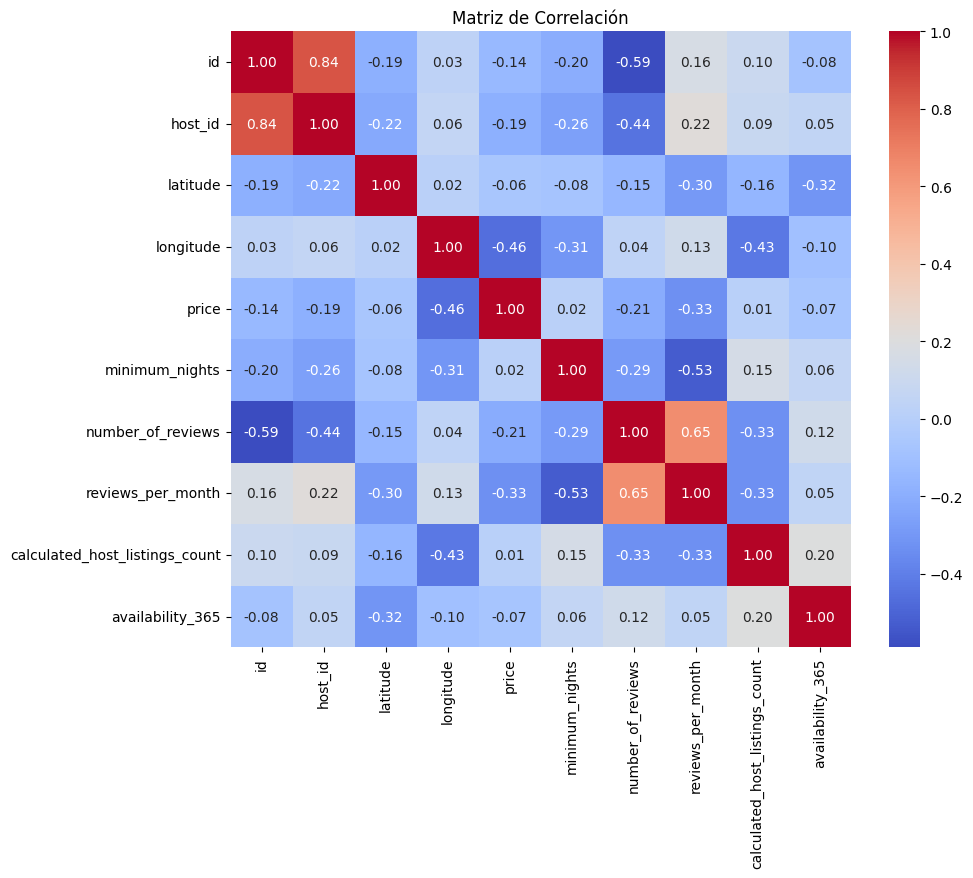

In [94]:
# Matriz de correlación
corr_matrix = df_num.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Se observa una correlación positiva entre number_of_reviews y reviews_per_month, lo que indica que a medida que aumenta el número de reseñas, también lo hace la cantidad de reseñas mensuales. Además, existe una correlación negativa entre price y minimum_nights, sugiriendo que los alojamientos con precios más altos tienden a tener un requisito mínimo de noches más bajo.

In [95]:
df2.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

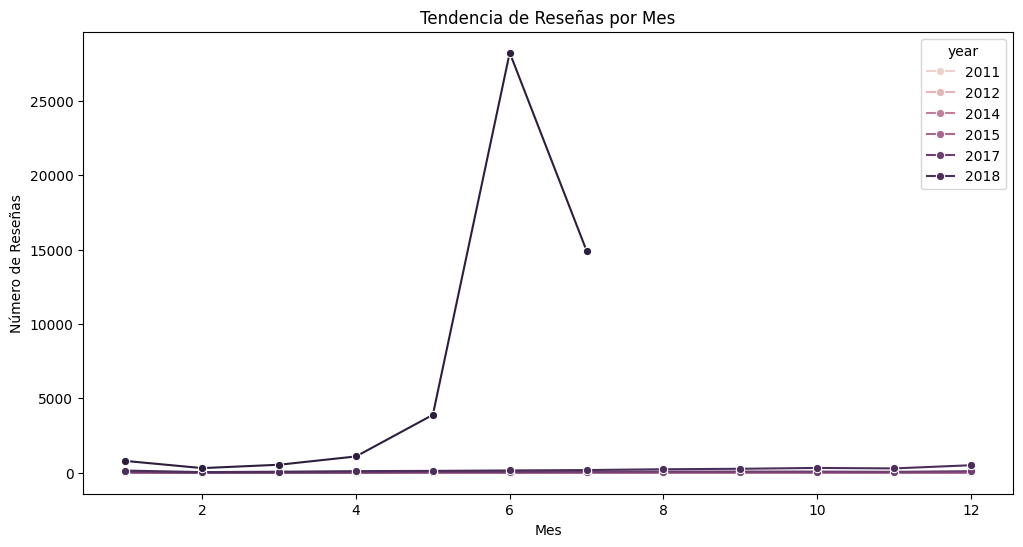

In [96]:
# Convertir 'last_review' a formato datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Extraer año y mes
df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month

# Agrupar por año y mes
monthly_reviews = df.groupby(['year', 'month'])['reviews_per_month'].sum().reset_index()

# Gráfico de tendencias
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='reviews_per_month', data=monthly_reviews, hue='year', marker='o')
plt.title('Tendencia de Reseñas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Reseñas')
plt.show()

In [ ]:
# 2. Dividir el dataset en train y test (ejemplo: 80% - 20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# 3. (Opcional) crear una "columna simulada" como 'Survived' para emular el Titanic
# Aquí vamos a suponer que queremos marcar 1 si el precio > 100, 0 si no
test_data["HighPrice"] = (test_data["price"] > 100).astype(int)
train_data["HighPrice"] = (train_data["price"] > 100).astype(int)

# 4. Concatenar train y test como en el ejemplo del Titanic
total_data = pd.concat([train_data, test_data]).reset_index(inplace=False)

# 5. Eliminar columna 'index' si aparece
if "index" in total_data.columns:
    total_data.drop(columns=["index"], inplace=True)

# 6. Mostrar el resultado
print(total_data.head())
print(total_data.shape)

         id   host_id neighbourhood_group       neighbourhood  latitude  \
0  25674366   9038810            Brooklyn        Williamsburg  40.71577   
1  19100971  81745867           Manhattan  Washington Heights  40.84917   
2  24209867   1218837            Brooklyn  Bedford-Stuyvesant  40.68993   
3  22451798   4126686            Brooklyn  Bedford-Stuyvesant  40.68427   
4   5344850  27698133              Queens            Woodside  40.74705   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.95530  Entire home/apt    295               3                 11   
1  -73.94048     Private room     70               2                  2   
2  -73.95947     Private room     58               2                  0   
3  -73.93118  Entire home/apt     75               3                 87   
4  -73.89564     Private room     38               5                 13   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0           0.870000    

Exploración

In [ ]:
df.shape

(48895, 13)

Obtener información sobre tipos de datos y valores no nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

Eliminar duplicados

In [ ]:
df2 = df.copy()

In [ ]:
id_dup = df2["id"].duplicated().sum()
id_dup

np.int64(0)

In [ ]:

print(df2.isnull().sum())

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [98]:
if df2.duplicated().sum():
    df2 = df2.drop_duplicates()
print(df2.shape)
df2.head()

(48895, 13)


id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0           0.210000                               6               365  
1           0.380000                               2               355  
2           1.373221                               1               365  
3           4.640000                               1               194  
4           0.100000                               1                 0

Eliminar información irrelevante (host_name)

In [99]:
df2.drop(["host_name"], axis = 1, inplace = True)
df2.head(3)

KeyError: "['host_name'] not found in axis"

Valores NaN convertidos a "0"

In [113]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

Análisis de variables univariante

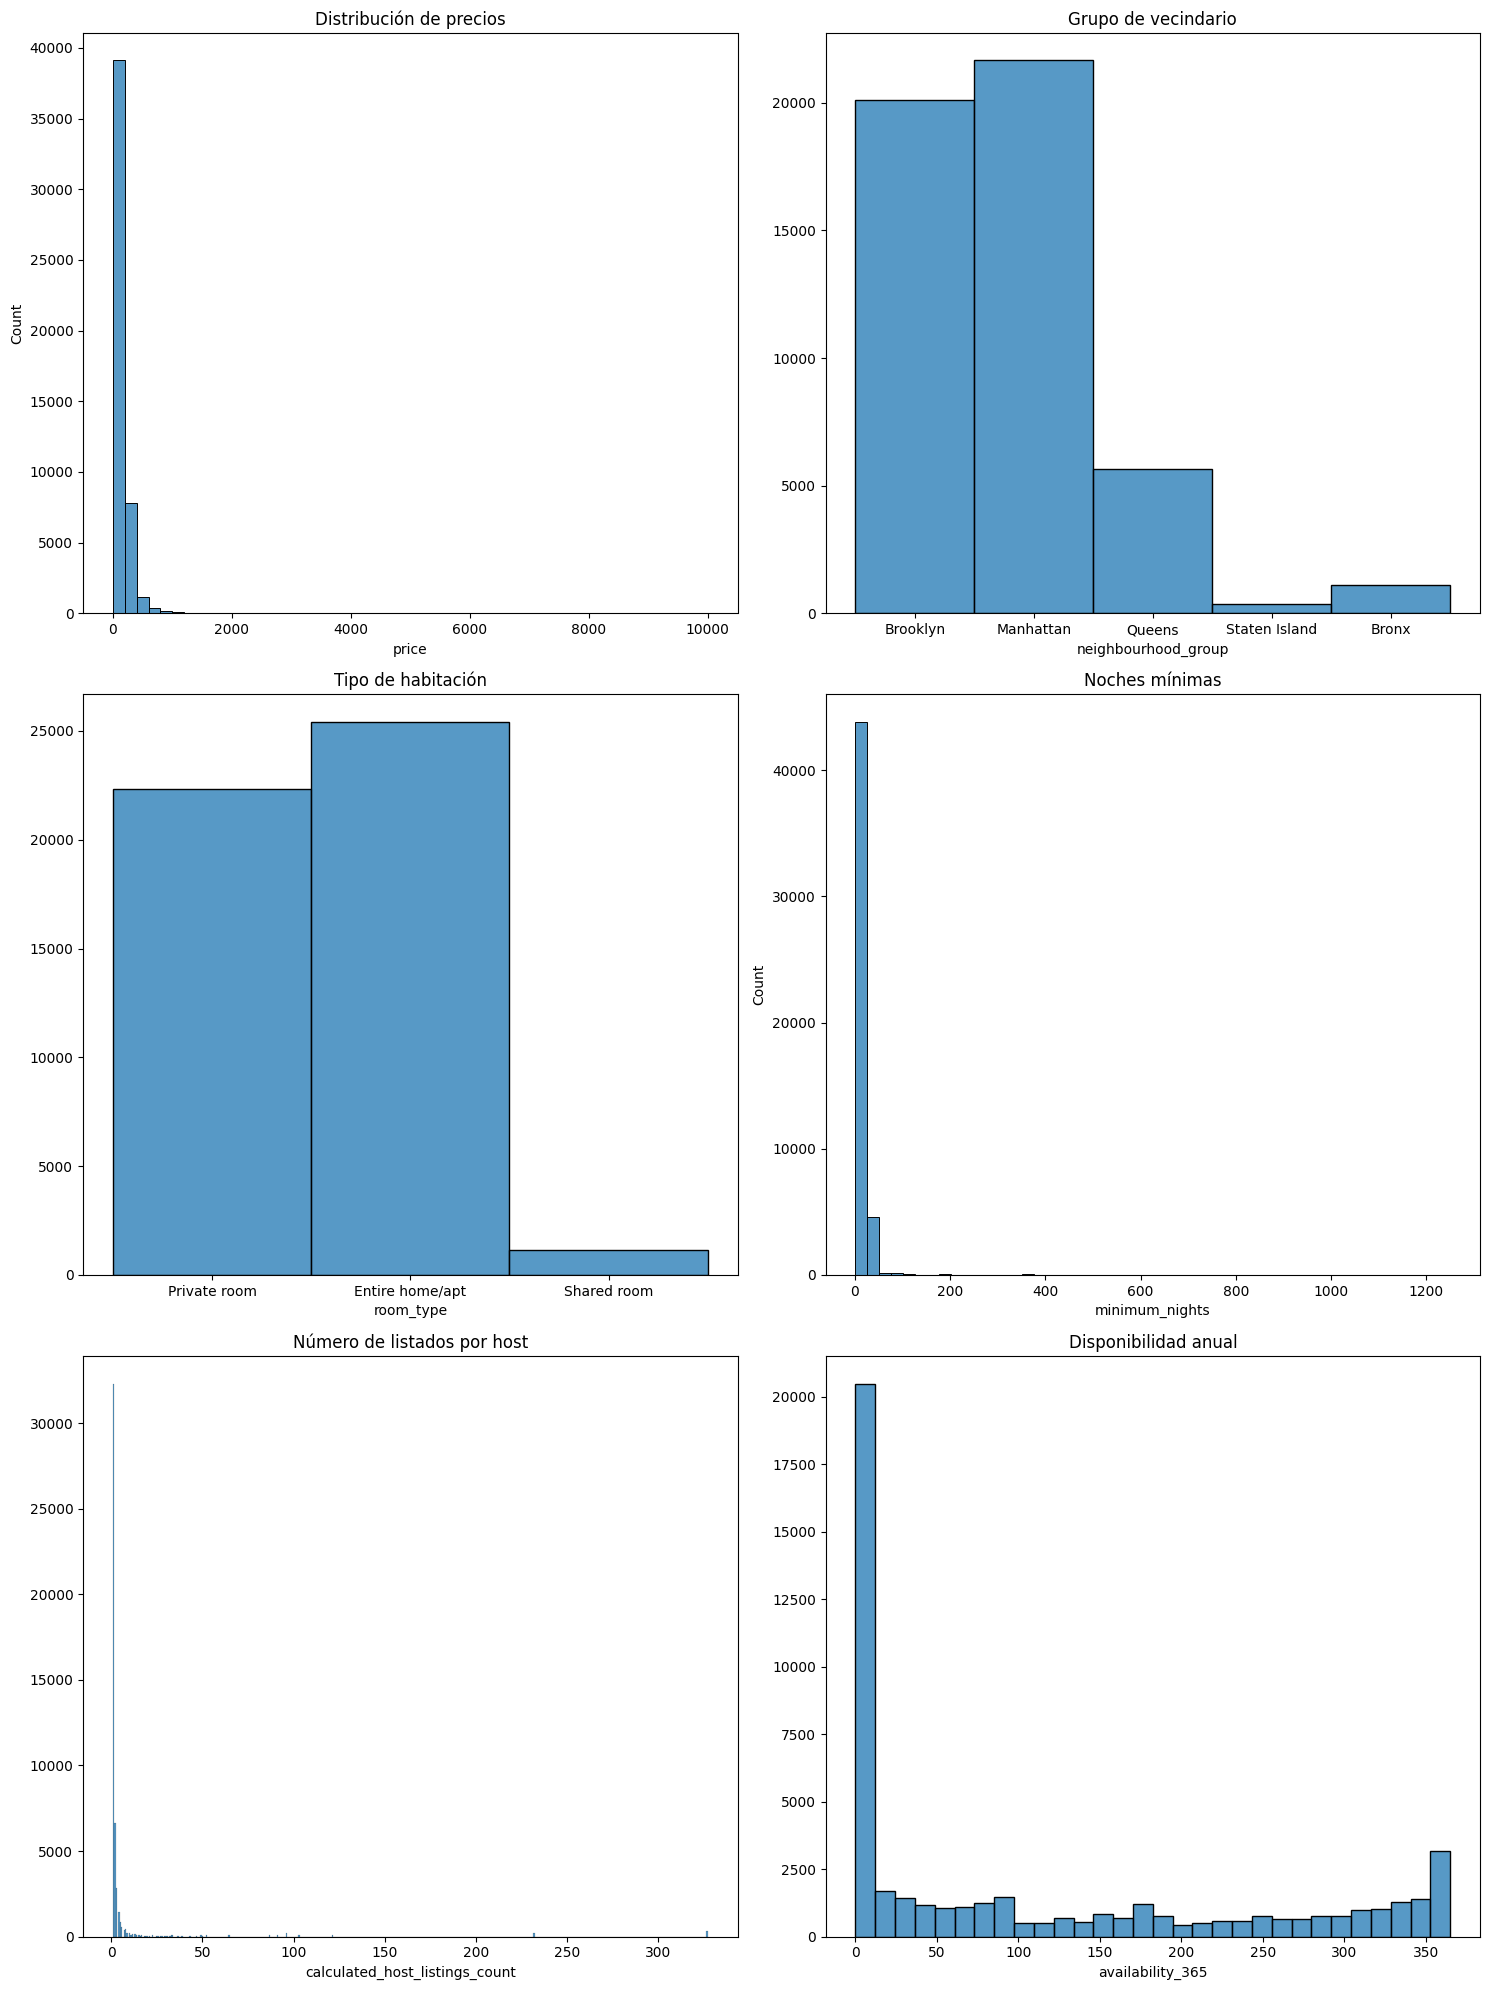

In [116]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Definir figura con 2 filas y 3 columnas
fig, axis = plt.subplots(3, 2, figsize=(15, 20))

# Histograma de 'price'
sns.histplot(ax=axis[0, 0], data=df, x="price", bins=50, kde=False).set(title="Distribución de precios")

# Histograma de 'neighbourhood_group'
sns.histplot(ax=axis[0, 1], data=df, x="neighbourhood_group").set(ylabel=None, title="Grupo de vecindario")

# Histograma de 'room_type'
sns.histplot(ax=axis[1, 0], data=df, x="room_type").set(ylabel=None, title="Tipo de habitación")

# Histograma de 'minimum_nights'
sns.histplot(ax=axis[1, 1], data=df, x="minimum_nights", bins=50).set(title="Noches mínimas")

# Histograma de 'calculated_host_listings_count'
sns.histplot(ax=axis[2, 0], data=df, x="calculated_host_listings_count").set(ylabel=None, title="Número de listados por host")

# Histograma de 'availability_365'
sns.histplot(ax=axis[2, 1], data=df, x="availability_365").set(ylabel=None, title="Disponibilidad anual")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

variables numéricas:

In [117]:
df2.corr(numeric_only = True)

id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.253252  0.255046 -0.009115   0.131599   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   
distancia_centro                0.070932  0.088455 -0.682415   0.388032   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id                         0.015309       -0.017364          -0.140106   
latitude                        0.033939        0.024869          -0.015389   
longitude                      -0.150019       -0.062747           0.059094   
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
reviews_per_month              -0.022373       -0.091942           0.530093   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   
distancia_centro               -0.120920       -0.063266           0.050488   

                                reviews_per_month  \
id                                       0.253252   
host_id                                  0.255046   
latitude                                -0.009115   
longitude                                0.131599   
price                                   -0.022373   
minimum_nights                          -0.091942   
number_of_reviews                        0.530093   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.006701   
availability_365                         0.162980   
distancia_centro                         0.095471   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.006701   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   
distancia_centro                                     -0.067071   

                                availability_365  distancia_centro  
id                                      0.085468          0.070932  
host_id                                 0.203492          0.088455  
latitude                               -0.010983         -0.682415  
longitude                               0.082731          0.388032  
price                                   0.081829         -0.120920  
minimum_nights                          0.144303         -0.063266  
number_of_reviews                       0.172028          0.050488  
reviews_per_month                       0.162980          0.095471  
calculated_host_listings_count          0.225701         -0.067071  
availability_365                        1.000000          0.091870  

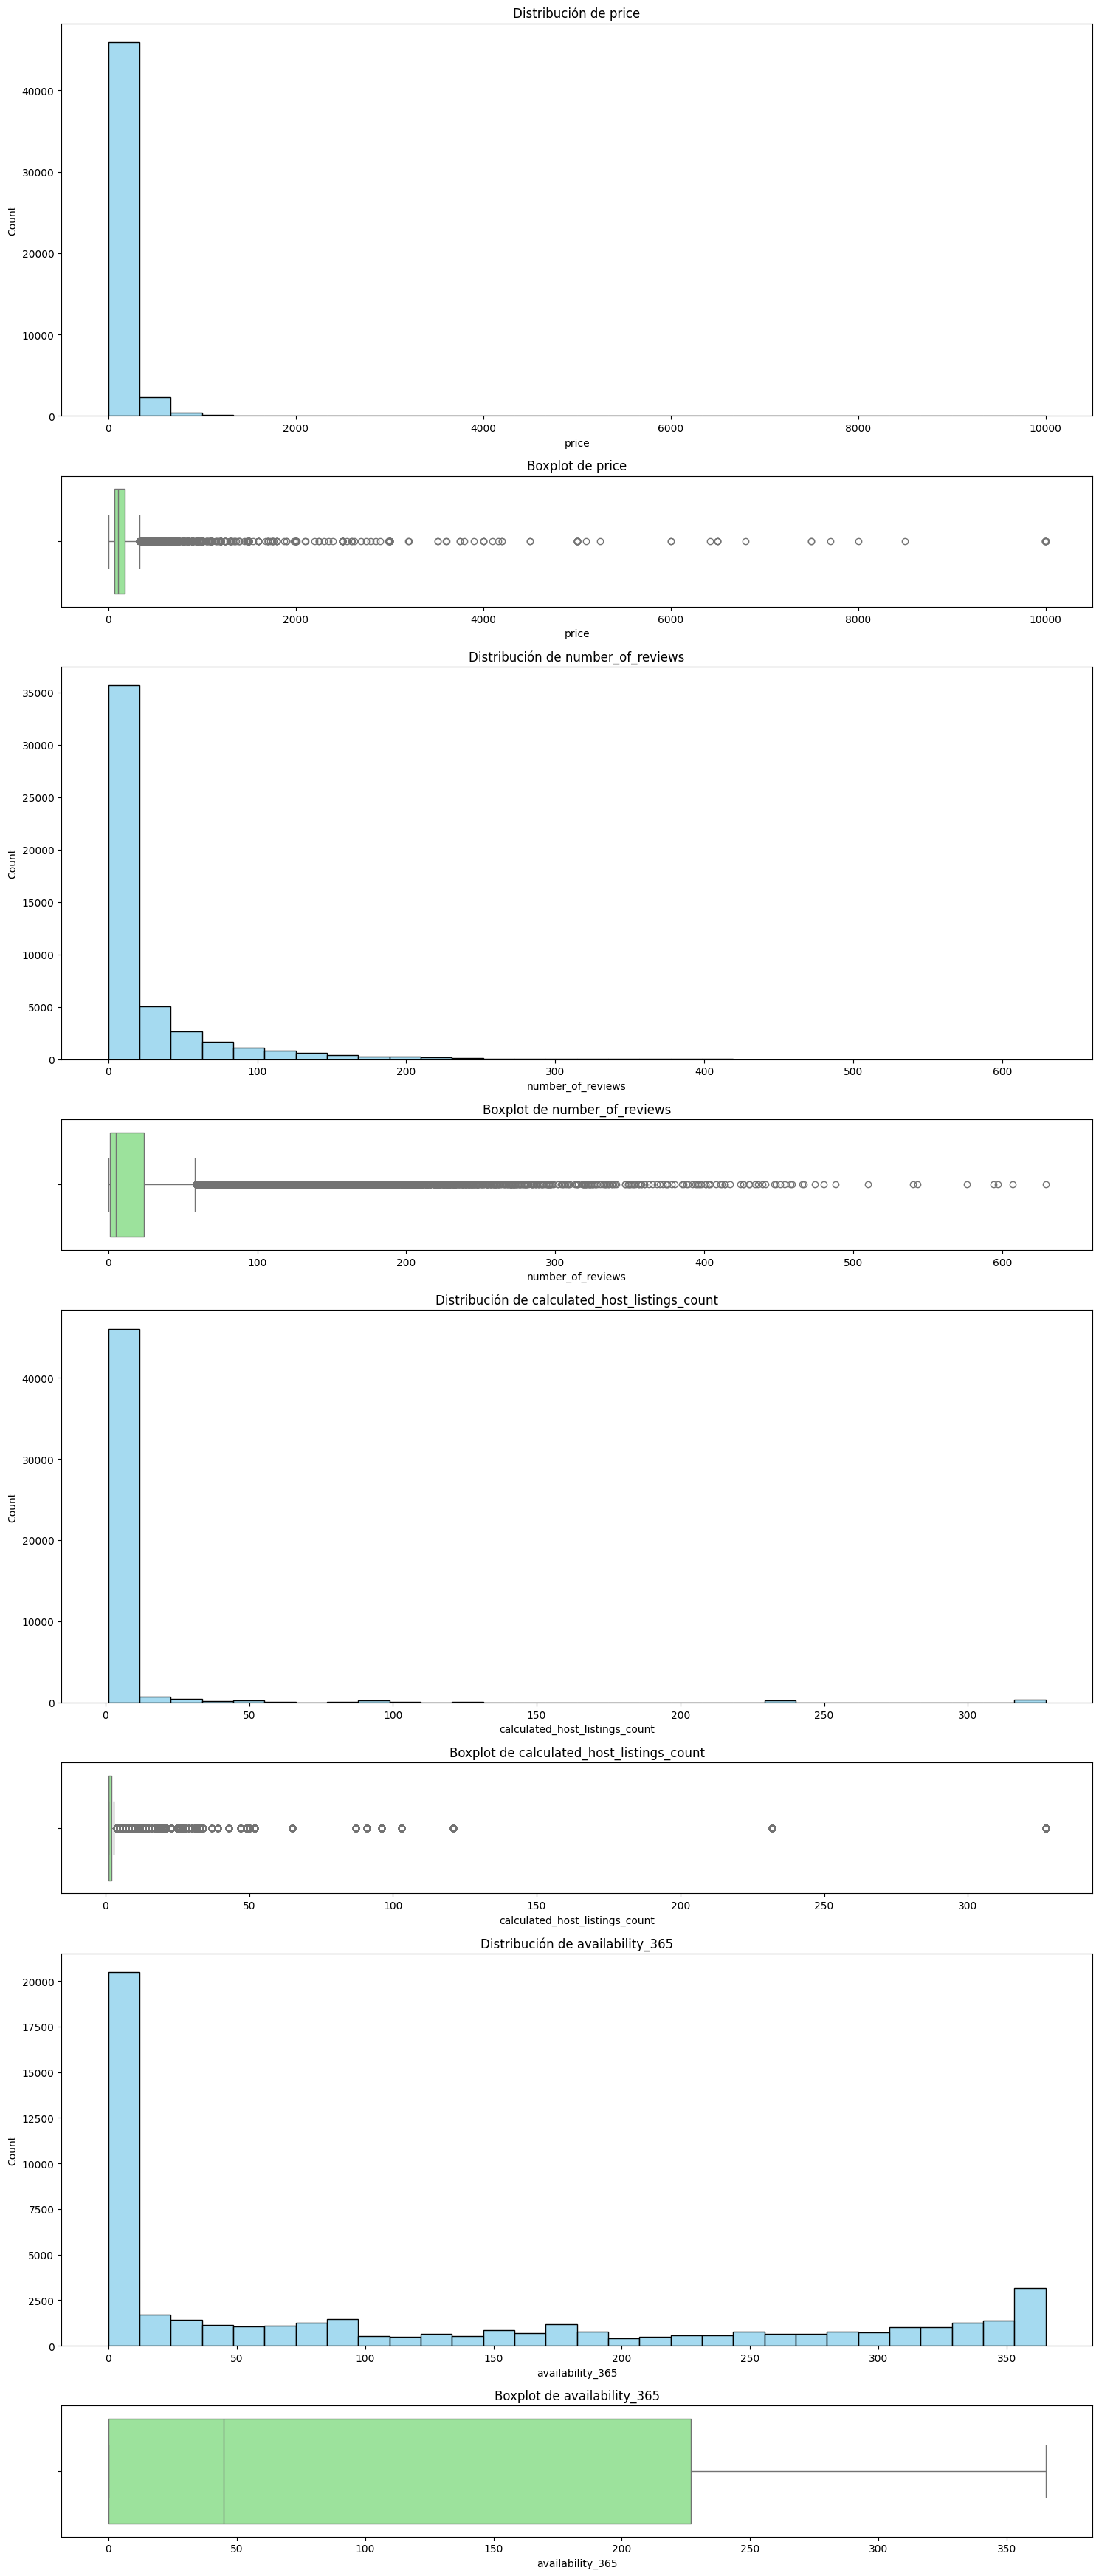

In [119]:
variables = ["price", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# Creamos 8 subplots en una sola columna (4 histogramas + 4 boxplots)
fig, axes = plt.subplots(
    nrows=8, ncols=1, figsize=(15, 35),
    gridspec_kw={'height_ratios': [3,1,3,1,3,1,3,1]}  # Hist más alto, box más bajo
)

for i, var in enumerate(variables):
    # Histograma (posición par: 0,2,4,6)
    sns.histplot(ax=axes[2*i], data=total_data, x=var, bins=30, color='skyblue')
    axes[2*i].set_title(f'Distribución de {var}')

    # Boxplot (posición impar: 1,3,5,7)
    sns.boxplot(ax=axes[2*i+1], data=total_data, x=var, color='lightgreen')
    axes[2*i+1].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

Análisis de correlación

In [102]:
# Centro de referencia (ejemplo: centro de CDMX)
lat_ref, lon_ref = 40.7828647,  -73.9653551

# Distancia euclidiana aproximada
df2["distancia_centro"] = np.sqrt((df2["latitude"] - lat_ref)**2 + (df2["longitude"] - lon_ref)**2)

print(df2[["price", "latitude", "longitude", "distancia_centro"]])

       price  latitude  longitude  distancia_centro
0        149  40.64749  -73.97237          0.135556
1        225  40.75362  -73.98377          0.034560
2        150  40.80902  -73.94190          0.035132
3         89  40.68514  -73.95976          0.097885
4         80  40.79851  -73.94399          0.026481
...      ...       ...        ...               ...
48890     70  40.67853  -73.94995          0.105466
48891     40  40.70184  -73.93317          0.087183
48892    115  40.81475  -73.94867          0.035987
48893     55  40.75751  -73.99112          0.036148
48894     90  40.76404  -73.98933          0.030482

[48895 rows x 4 columns]


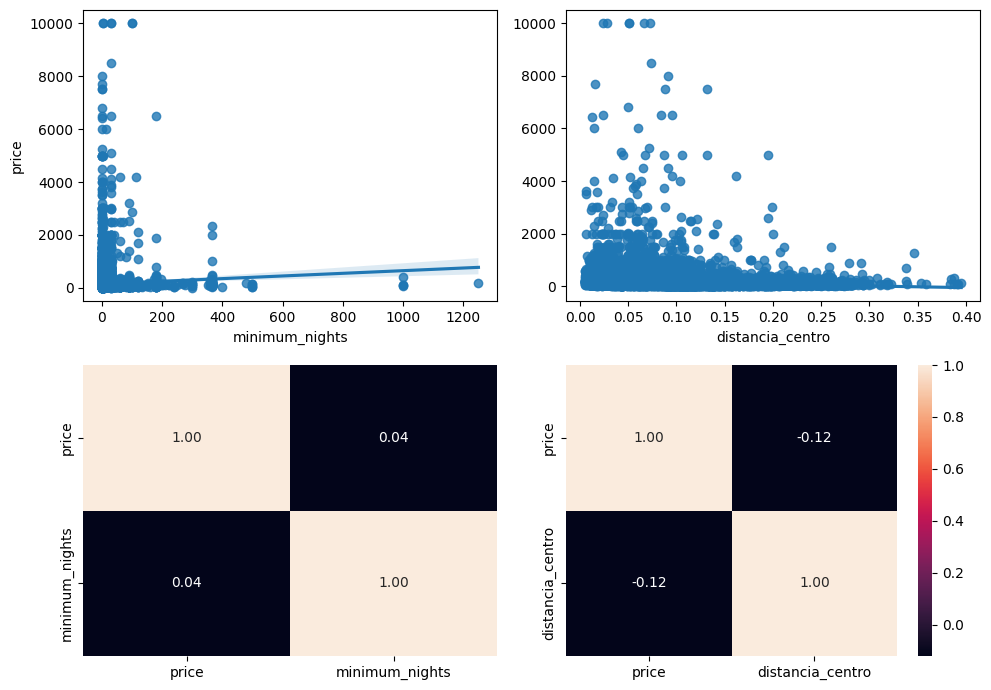

In [103]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df2, x = "minimum_nights", y = "price")
sns.heatmap(df2[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df2, x = "distancia_centro", y = "price").set(ylabel=None)
sns.heatmap(df2[["price", "distancia_centro"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [104]:
df2.corr(numeric_only = True)

id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.253252  0.255046 -0.009115   0.131599   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   
distancia_centro                0.070932  0.088455 -0.682415   0.388032   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id                         0.015309       -0.017364          -0.140106   
latitude                        0.033939        0.024869          -0.015389   
longitude                      -0.150019       -0.062747           0.059094   
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
reviews_per_month              -0.022373       -0.091942           0.530093   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   
distancia_centro               -0.120920       -0.063266           0.050488   

                                reviews_per_month  \
id                                       0.253252   
host_id                                  0.255046   
latitude                                -0.009115   
longitude                                0.131599   
price                                   -0.022373   
minimum_nights                          -0.091942   
number_of_reviews                        0.530093   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.006701   
availability_365                         0.162980   
distancia_centro                         0.095471   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.006701   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   
distancia_centro                                     -0.067071   

                                availability_365  distancia_centro  
id                                      0.085468          0.070932  
host_id                                 0.203492          0.088455  
latitude                               -0.010983         -0.682415  
longitude                               0.082731          0.388032  
price                                   0.081829         -0.120920  
minimum_nights                          0.144303         -0.063266  
number_of_reviews                       0.172028          0.050488  
reviews_per_month                       0.162980          0.095471  
calculated_host_listings_count          0.225701         -0.067071  
availability_365                        1.000000          0.091870  

In [105]:
# Extraer columnas categóricas
cat_vars = df2.select_dtypes(include=['object', 'category'])
print(cat_vars.columns)

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


In [106]:
df2.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'distancia_centro'],
      dtype='object')

Análisis de variables categóricas

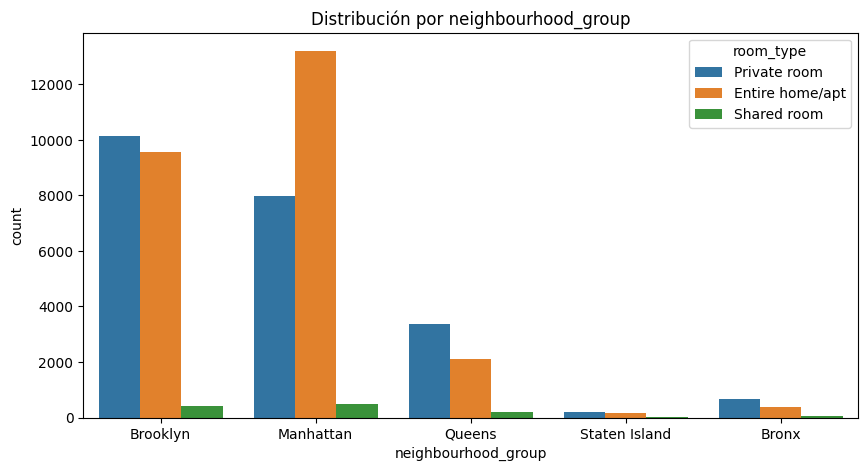

In [107]:
# 1. neighbourhood_group vs price
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x="neighbourhood_group", hue="room_type")
plt.title("Distribución por neighbourhood_group")
plt.show()

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_18212\1451076490.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


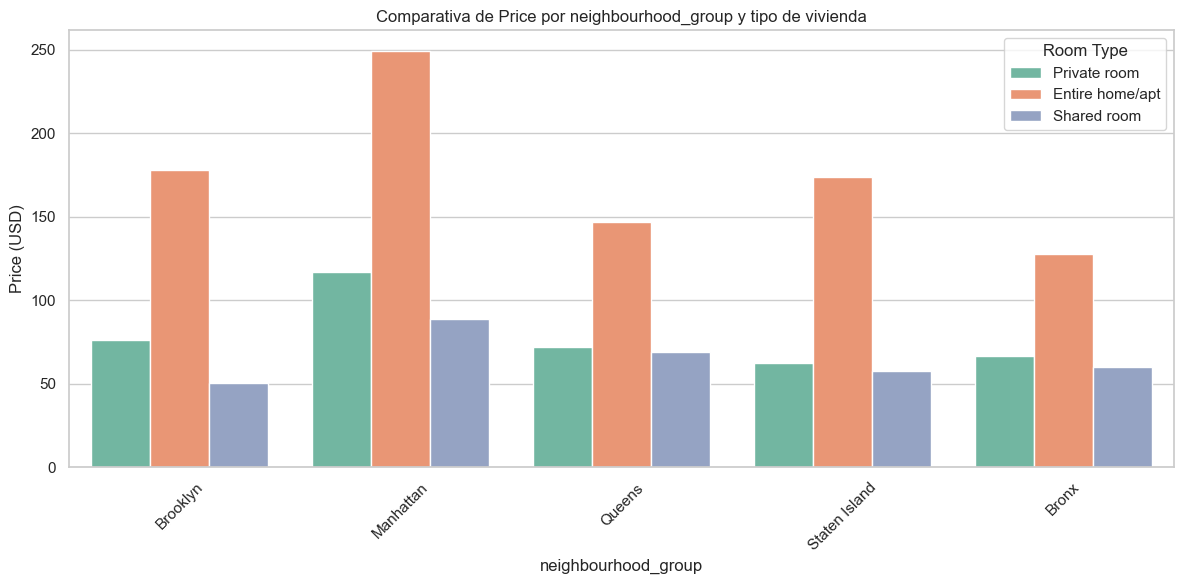

In [125]:
# Variables a analizar
variables = ["neighbourhood_group"]

# Ajustes de estilo
sns.set(style="whitegrid")

for var in variables:
    plt.figure(figsize=(12, 6))
    # Gráfico de barras con comparación por tipo de vivienda
    sns.barplot(
        data=df,
        x=var,
        y="price",
        hue="room_type",
        ci=None,   # sin intervalos de confianza
        palette="Set2"
    )
    plt.title(f"Comparativa de Price por {var} y tipo de vivienda")
    plt.ylabel("Price (USD)")
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.legend(title="Room Type")
    plt.tight_layout()
    plt.show()

In [ ]:
Análisis de correlaciones

In [126]:
# Cargar la base de datos
file_path = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\13.- Análisis exploratorio de Datos (EDA)\Data\AB_NYC_2019.csv\AB_NYC_2019.csv"
df = pd.read_csv(file_path)

# Crear variable categórica: precio alto/bajo según la mediana
df["high_price"] = df["price"] > df["price"].median()

# Función para análisis Chi-cuadrado
def chi2_analysis(var, target="high_price"):
    tabla = pd.crosstab(df[var], df[target])
    print(f"{var} vs {target}")
    print(tabla, "\n")
    
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")
    
    if p < 0.05:
        print(f"Existe una relación significativa entre {var} y {target}.\n")
    else:
        print(f"No se observa una relación estadísticamente significativa entre {var} y {target}.\n")

# Variables categóricas a analizar
categorical_vars = ["neighbourhood_group", "room_type"]

for var in categorical_vars:
    chi2_analysis(var)

neighbourhood_group vs high_price
high_price           False  True 
neighbourhood_group              
Bronx                  879    212
Brooklyn             11994   8110
Manhattan             7164  14497
Queens                4159   1507
Staten Island          276     97 

Chi2 = 4967.77, p-value = 0.0000

Existe una relación significativa entre neighbourhood_group y high_price.

room_type vs high_price
high_price       False  True 
room_type                    
Entire home/apt   4905  20504
Private room     18530   3796
Shared room       1037    123 

Chi2 = 20020.30, p-value = 0.0000

Existe una relación significativa entre room_type y high_price.



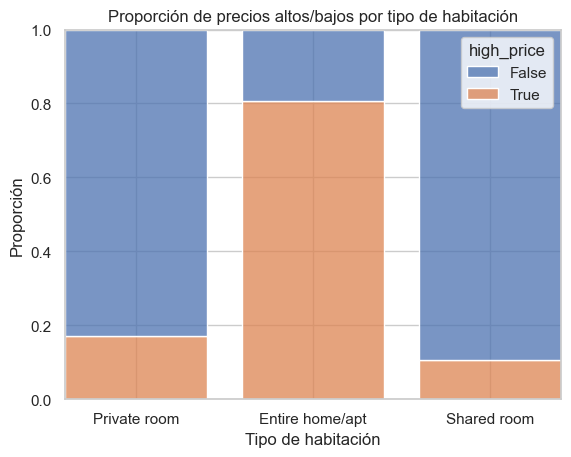

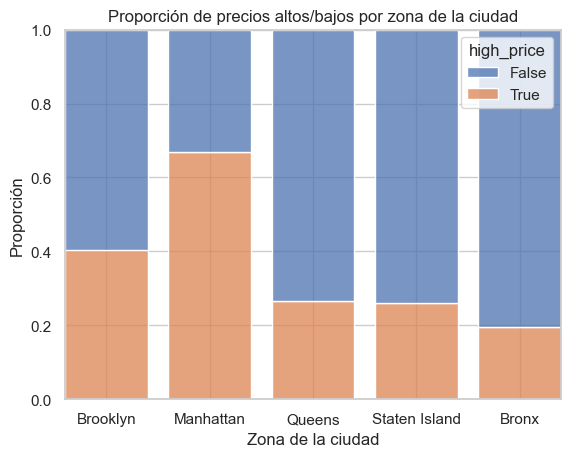

In [127]:
# Visualización: proporción de precio alto/bajo por tipo de habitación
sns.histplot(data=df, x="room_type", hue="high_price", multiple="fill", shrink=0.8)
plt.title("Proporción de precios altos/bajos por tipo de habitación")
plt.ylabel("Proporción")
plt.xlabel("Tipo de habitación")
plt.show()

# Visualización: proporción de precio alto/bajo por zona de la ciudad
sns.histplot(data=df, x="neighbourhood_group", hue="high_price", multiple="fill", shrink=0.8)
plt.title("Proporción de precios altos/bajos por zona de la ciudad")
plt.ylabel("Proporción")
plt.xlabel("Zona de la ciudad")
plt.show()

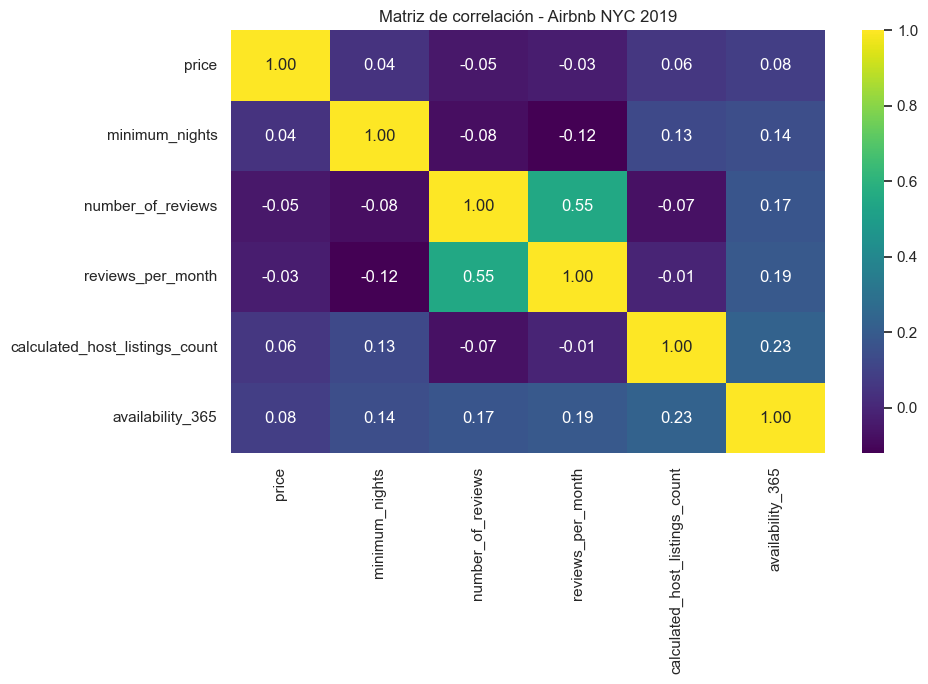

In [128]:
# Variables numéricas del dataset Airbnb NYC 2019
cols_num = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df[cols_num].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.title("Matriz de correlación - Airbnb NYC 2019")
plt.tight_layout()
plt.show()

avg_price
room_type                  
Entire home/apt  211.794246
Private room      89.780973
Shared room       70.127586

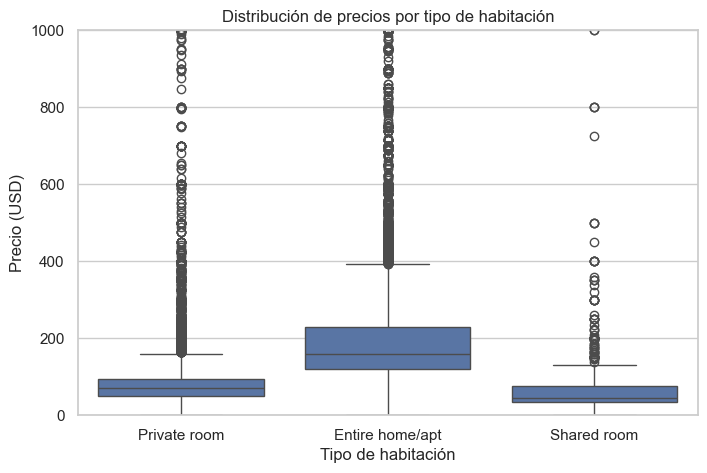

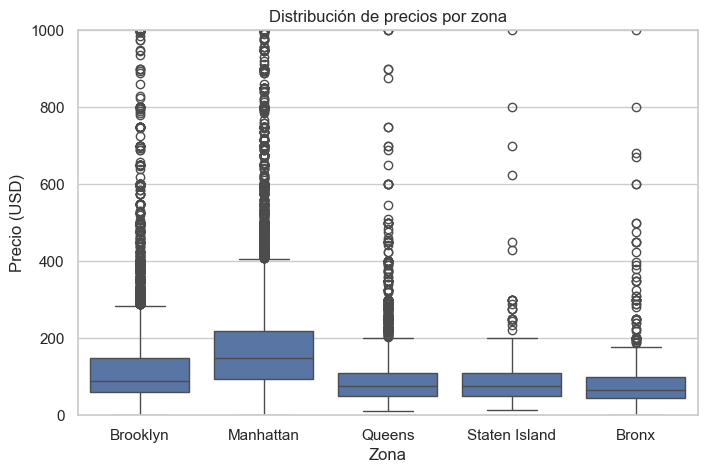

In [130]:
# Promedio de precio por tipo de habitación
display(df.groupby("room_type")["price"].mean().rename("avg_price").to_frame())

# Boxplot: Precio por tipo de habitación
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="room_type", y="price")
plt.title("Distribución de precios por tipo de habitación")
plt.ylabel("Precio (USD)")
plt.xlabel("Tipo de habitación")
plt.ylim(0, 1000)  # límite opcional para no distorsionar con outliers extremos
plt.show()

# Boxplot: Precio por zona de la ciudad
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="neighbourhood_group", y="price")
plt.title("Distribución de precios por zona")
plt.ylabel("Precio (USD)")
plt.xlabel("Zona")
plt.ylim(0, 1000)  # límite opcional
plt.show()

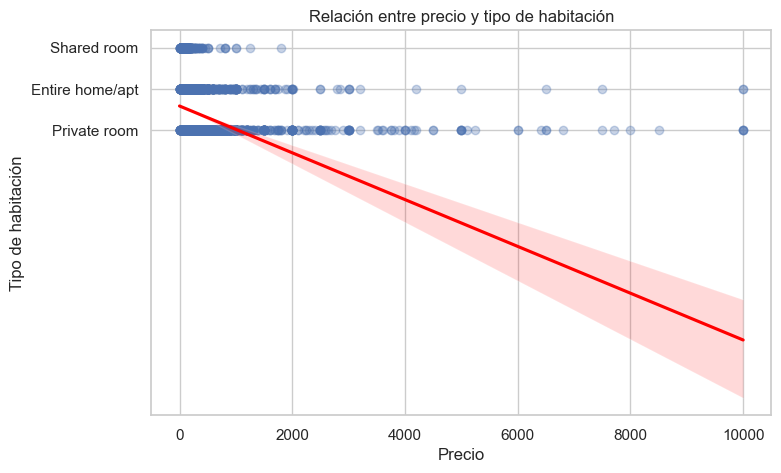

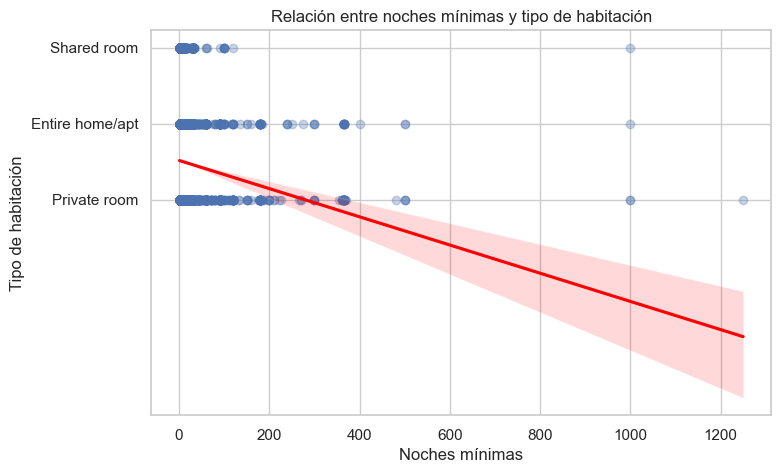

In [133]:
# Copia del dataframe para no alterar el original
df_plot = df.copy()

# Convertir room_type (categórica) a códigos numéricos
df_plot["room_type_code"] = df_plot["room_type"].astype("category").cat.codes

# Gráfico 1: relación entre precio y tipo de habitación
plt.figure(figsize=(8,5))
sns.regplot(data=df_plot, x="price", y="room_type_code", scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.yticks(df_plot["room_type_code"].unique(), df_plot["room_type"].astype("category").cat.categories)
plt.title("Relación entre precio y tipo de habitación")
plt.xlabel("Precio")
plt.ylabel("Tipo de habitación")
plt.show()

# Gráfico 2: relación entre noches mínimas y tipo de habitación
plt.figure(figsize=(8,5))
sns.regplot(data=df_plot, x="minimum_nights", y="room_type_code", scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.yticks(df_plot["room_type_code"].unique(), df_plot["room_type"].astype("category").cat.categories)
plt.title("Relación entre noches mínimas y tipo de habitación")
plt.xlabel("Noches mínimas")
plt.ylabel("Tipo de habitación")
plt.show()

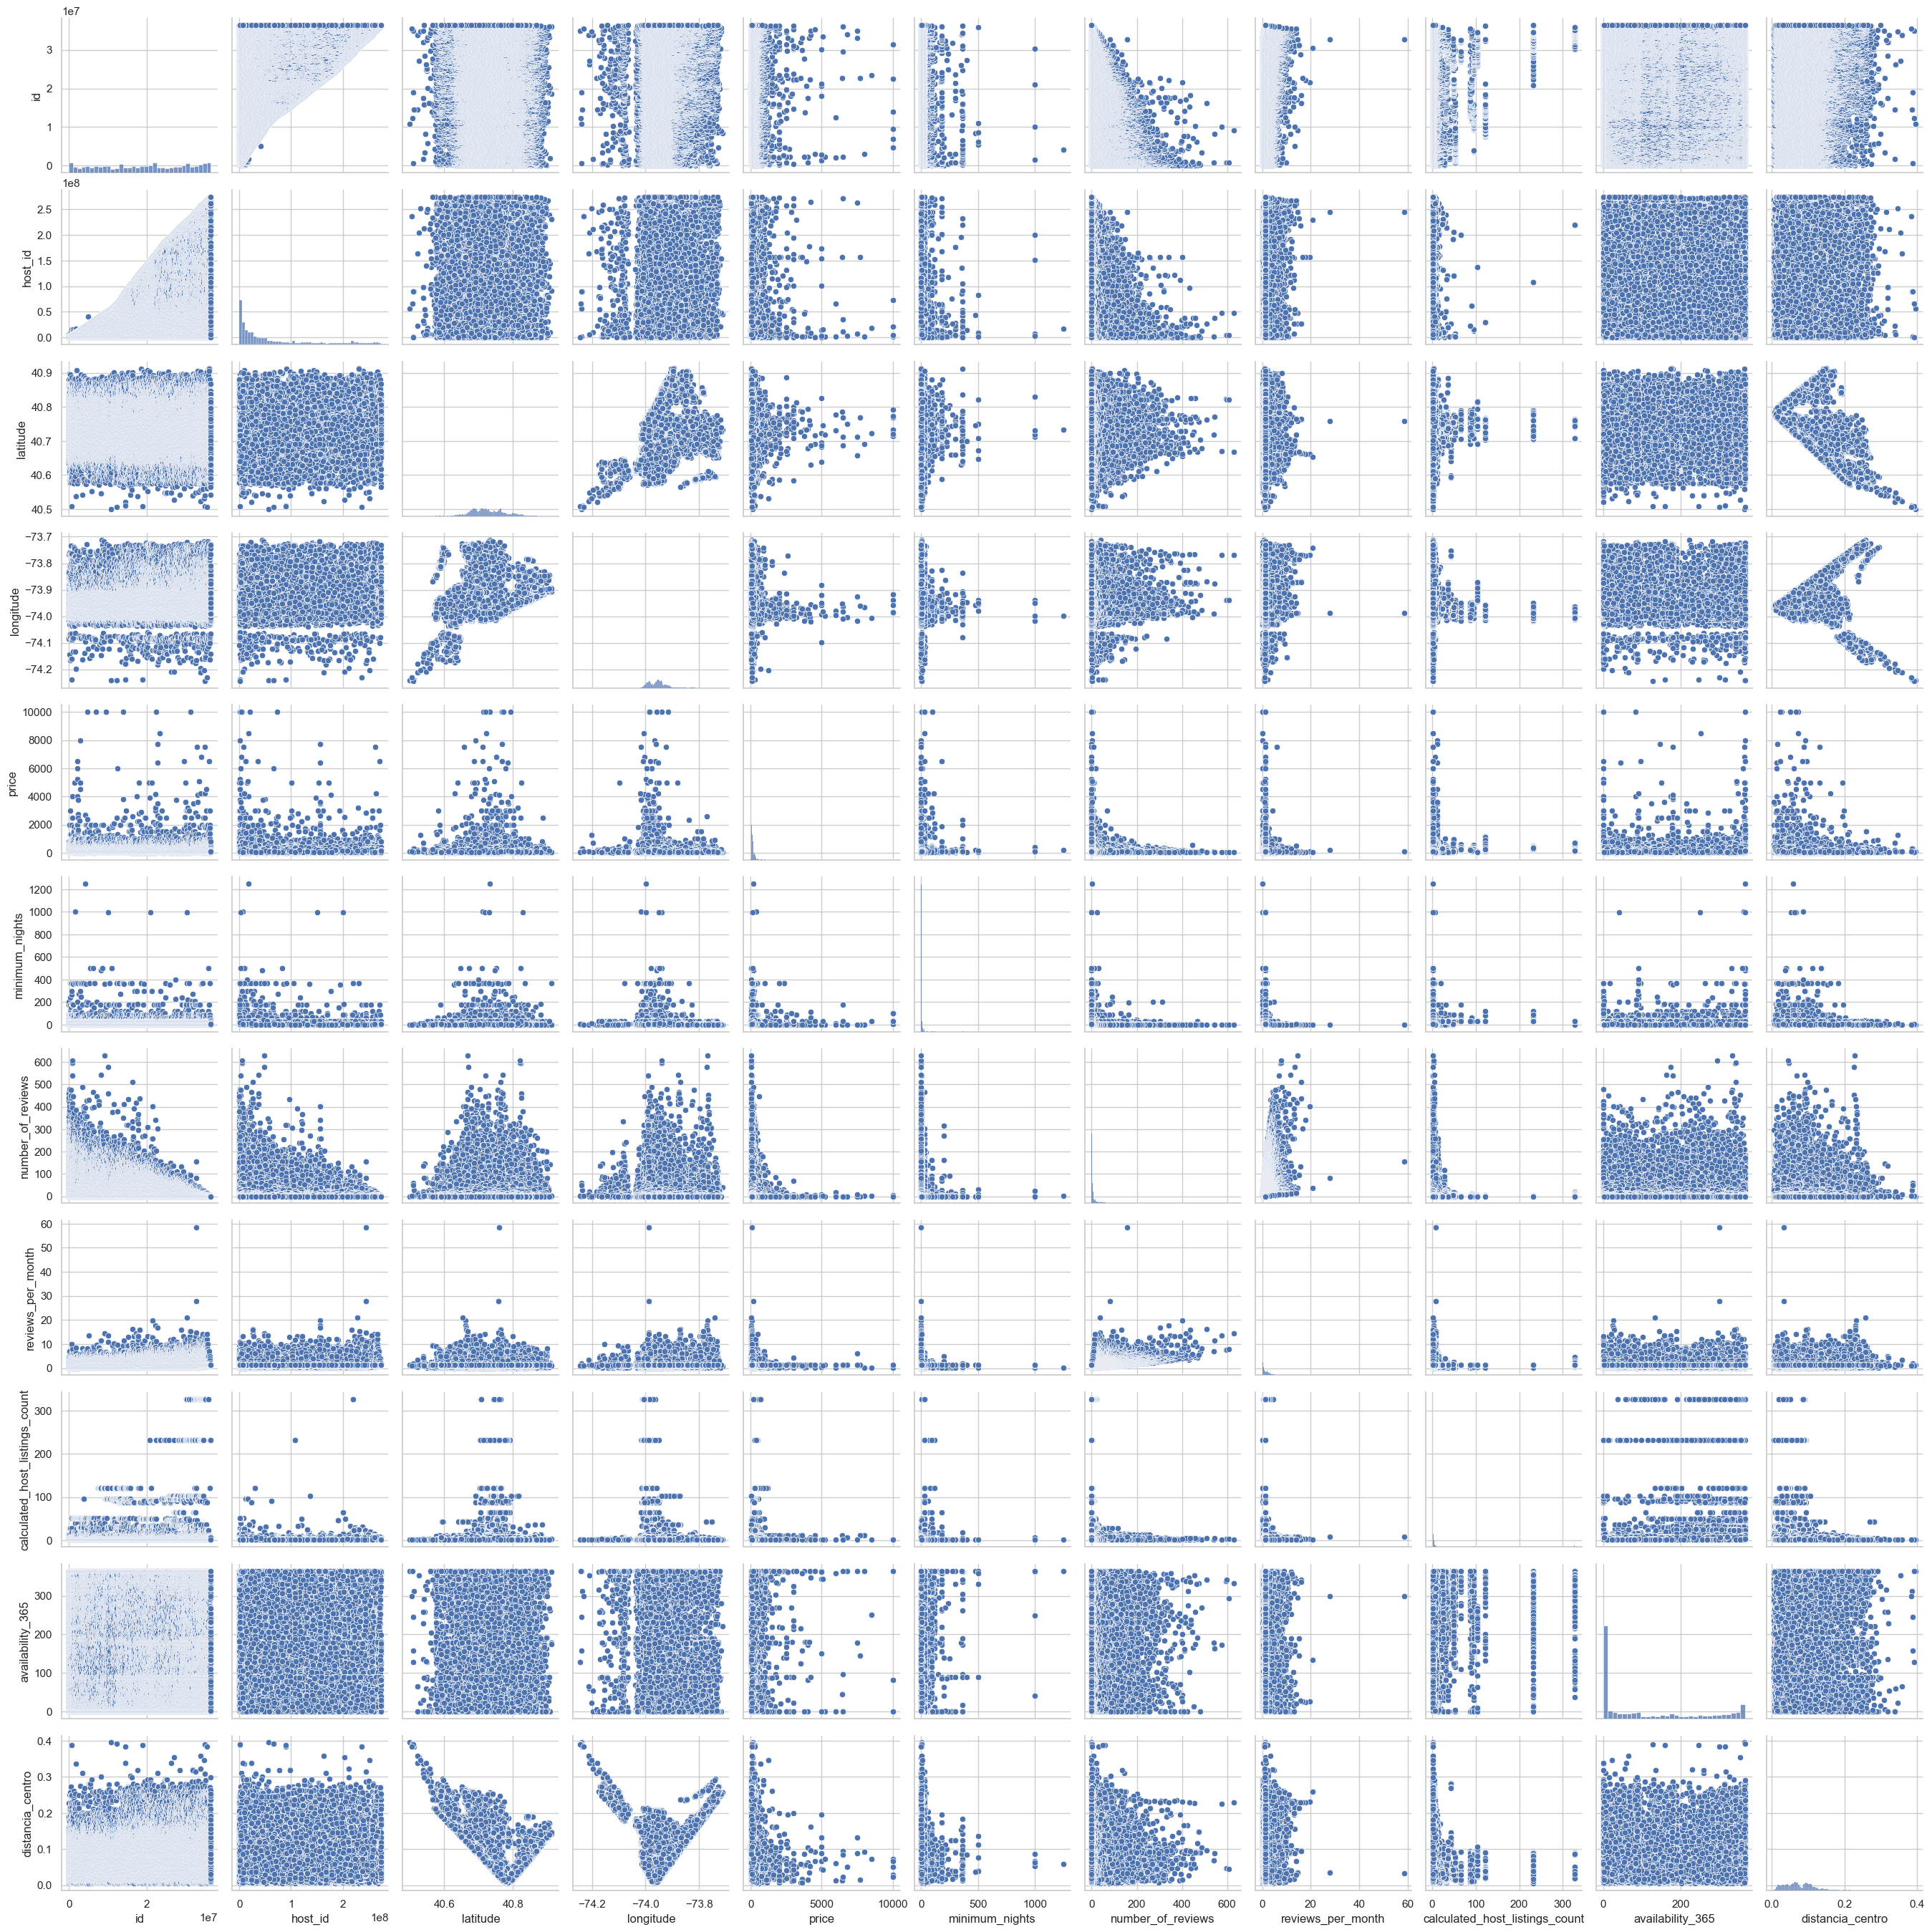

In [134]:
sns.pairplot(data = df2)

In [135]:
df2.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.497775   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.280000   
50%          3.000000           5.000000           1.220000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  distancia_centro  
count                    48895.000000      48895.000000      48895.000000  
mean                         7.143982        112.781327          0.078026  
std                         32.952519        131.622289          0.045789  
min                          1.000000          0.000000          0.004908  
25%                          1.000000          0.000000          0.043521  
50%                          1.000000         45.000000          0.070826  
75%                          2.000000        227.000000          0.102986  
max                        327.000000        365.000000          0.394998

In [ ]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

if "Sex_n" not in total_data.columns:
    total_data["Sex_n"] = total_data["Sex"].map({"male": 0, "female": 1})
if "Embarked_n" not in total_data.columns:
    total_data["Embarked_n"] = total_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
if "FamMembers" not in total_data.columns:
    total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pclass")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SibSp")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Parch")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "Fare")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Sex_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

In [137]:
# Extraer columnas numéricas
df2.corr(numeric_only = True)
print("Numéricas:", df2.columns)

# Extraer columnas categóricas
cat_vars = df2.select_dtypes(include=['object', 'category'])
print("Categóricas:", cat_vars.columns)

Numéricas: Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'distancia_centro'],
      dtype='object')
Categóricas: Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


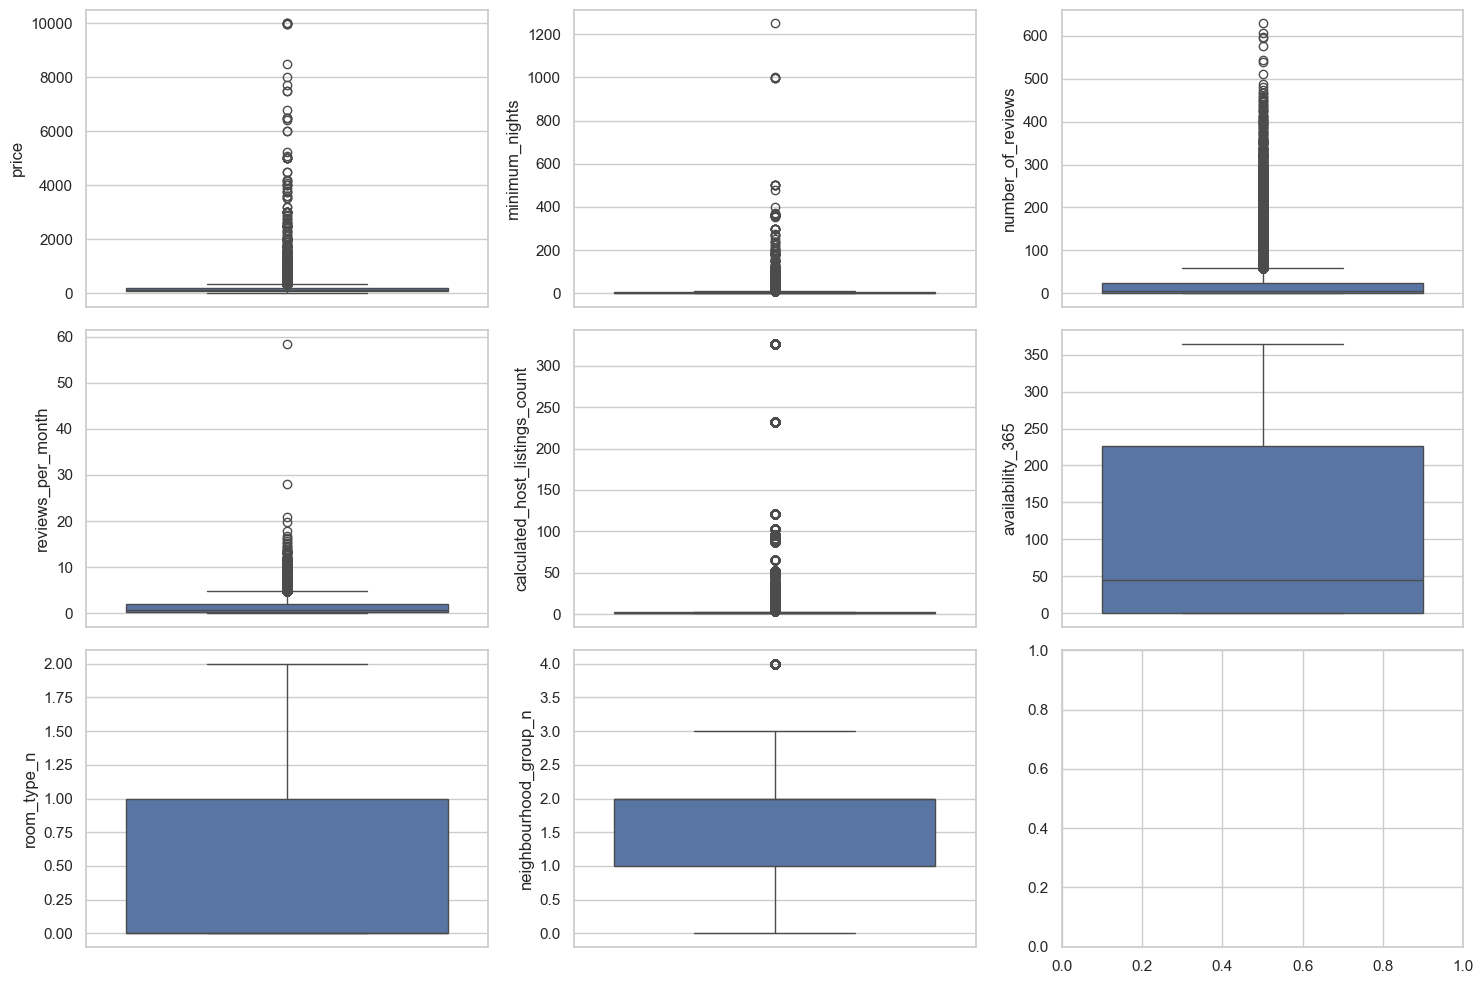

In [138]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

# Convertir variables categóricas en numéricas (si no existen)
if "room_type_n" not in df.columns:
    df["room_type_n"] = df["room_type"].astype("category").cat.codes
if "neighbourhood_group_n" not in df.columns:
    df["neighbourhood_group_n"] = df["neighbourhood_group"].astype("category").cat.codes

# Graficar boxplots de variables relevantes
sns.boxplot(ax=axis[0, 0], data=df, y="price")
sns.boxplot(ax=axis[0, 1], data=df, y="minimum_nights")
sns.boxplot(ax=axis[0, 2], data=df, y="number_of_reviews")
sns.boxplot(ax=axis[1, 0], data=df, y="reviews_per_month")
sns.boxplot(ax=axis[1, 1], data=df, y="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 2], data=df, y="availability_365")
sns.boxplot(ax=axis[2, 0], data=df, y="room_type_n")
sns.boxplot(ax=axis[2, 1], data=df, y="neighbourhood_group_n")

# Ajustar espacios
plt.tight_layout()
plt.show()

In [139]:
fare_stats = df2["price"].describe()
fare_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [140]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [141]:
df2.isnull().sum().sort_values(ascending=False)

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
distancia_centro                  0
dtype: int64

In [143]:
df2.isnull().sum().sort_values(ascending=False) / len(df2)

id                                0.0
host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
distancia_centro                  0.0
dtype: float64

In [144]:
# Rellenar valores nulos en variables numéricas
df["price"] = df["price"].fillna(df["price"].median())
df["minimum_nights"] = df["minimum_nights"].fillna(df["minimum_nights"].median())
df["number_of_reviews"] = df["number_of_reviews"].fillna(df["number_of_reviews"].median())
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())
df["calculated_host_listings_count"] = df["calculated_host_listings_count"].fillna(df["calculated_host_listings_count"].median())
df["availability_365"] = df["availability_365"].fillna(df["availability_365"].median())

# Rellenar valores nulos en variables categóricas
df["name"] = df["name"].fillna("Sin nombre")
df["host_name"] = df["host_name"].fillna("Sin host")
df["last_review"] = df["last_review"].fillna("Sin reseña")

# Verificar valores nulos restantes
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
high_price                        0
room_type_code                    0
room_type_n                       0
neighbourhood_group_n             0
dtype: int64


In [145]:
# Crear nueva columna: nivel de actividad del host
df2["HostActivity"] = df2["calculated_host_listings_count"] + df2["availability_365"]

# Mostrar primeras filas
df2.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0           0.210000                               6               365   
1           0.380000                               2               355   
2           1.373221                               1               365   
3           4.640000                               1               194   
4           0.100000                               1                 0   

   distancia_centro  HostActivity  
0          0.135556           371  
1          0.034560           357  
2          0.035132           366  
3          0.097885           195  
4          0.026481             1

In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Variables numéricas seleccionadas para escalamiento
num_variables = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "room_type_n",
    "neighbourhood_group_n"
]

X = df[num_variables]

# Normalización Z-score
scaler_norm = StandardScaler()
X_norm = pd.DataFrame(scaler_norm.fit_transform(X), index=df.index, columns=num_variables)

# Escalamiento Min-Max (0 a 1)
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), index=df.index, columns=num_variables)

# Mostrar primeras filas
X_norm.head(), X_minmax.head()

(      price  minimum_nights  number_of_reviews  reviews_per_month  \
 0 -0.015493       -0.293996          -0.320414          -0.776641   
 1  0.300974       -0.293996           0.487665          -0.663138   
 2 -0.011329       -0.196484          -0.522433           0.000000   
 3 -0.265335       -0.293996           5.538156           2.181110   
 4 -0.302811        0.144807          -0.320414          -0.850084   
 
    calculated_host_listings_count  availability_365  room_type_n  \
 0                       -0.034716          1.916250     0.909359   
 1                       -0.156104          1.840275    -0.924247   
 2                       -0.186451          1.916250     0.909359   
 3                       -0.186451          0.617065    -0.924247   
 4                       -0.186451         -0.856865    -0.924247   
 
    neighbourhood_group_n  
 0              -0.917828  
 1               0.441222  
 2               0.441222  
 3              -0.917828  
 4               0.441

In [153]:
# Variables numéricas y derivadas de Airbnb NYC
num_variables = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "room_type_n",
    "neighbourhood_group_n"
]

X = df[num_variables]

# Normalización (media 0, desviación estándar 1)
scaler_norm = StandardScaler()
X_norm = pd.DataFrame(scaler_norm.fit_transform(X), index=df.index, columns=num_variables)

# Escalado Min-Max (valores entre 0 y 1)
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), index=df.index, columns=num_variables)

# Mostrar primeras filas de ambos
X_norm.head(), X_minmax.head()

(      price  minimum_nights  number_of_reviews  reviews_per_month  \
 0 -0.015493       -0.293996          -0.320414          -0.776641   
 1  0.300974       -0.293996           0.487665          -0.663138   
 2 -0.011329       -0.196484          -0.522433           0.000000   
 3 -0.265335       -0.293996           5.538156           2.181110   
 4 -0.302811        0.144807          -0.320414          -0.850084   
 
    calculated_host_listings_count  availability_365  room_type_n  \
 0                       -0.034716          1.916250     0.909359   
 1                       -0.156104          1.840275    -0.924247   
 2                       -0.186451          1.916250     0.909359   
 3                       -0.186451          0.617065    -0.924247   
 4                       -0.186451         -0.856865    -0.924247   
 
    neighbourhood_group_n  
 0              -0.917828  
 1               0.441222  
 2               0.441222  
 3              -0.917828  
 4               0.441

In [156]:
from sklearn.preprocessing import MinMaxScaler

# Variables numéricas y derivadas del dataset Airbnb
num_variables = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "room_type_n",
    "neighbourhood_group_n"
]

X = df[num_variables]

# Normalización (media 0, desviación estándar 1)
scaler_norm = StandardScaler()
X_norm = pd.DataFrame(scaler_norm.fit_transform(X), index=df.index, columns=num_variables)

# Escalado Min-Max (valores entre 0 y 1)
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), index=df.index, columns=num_variables)

# Mostrar primeras filas de ambos
X_norm.head(), X_minmax.head()

(      price  minimum_nights  number_of_reviews  reviews_per_month  \
 0 -0.015493       -0.293996          -0.320414          -0.776641   
 1  0.300974       -0.293996           0.487665          -0.663138   
 2 -0.011329       -0.196484          -0.522433           0.000000   
 3 -0.265335       -0.293996           5.538156           2.181110   
 4 -0.302811        0.144807          -0.320414          -0.850084   
 
    calculated_host_listings_count  availability_365  room_type_n  \
 0                       -0.034716          1.916250     0.909359   
 1                       -0.156104          1.840275    -0.924247   
 2                       -0.186451          1.916250     0.909359   
 3                       -0.186451          0.617065    -0.924247   
 4                       -0.186451         -0.856865    -0.924247   
 
    neighbourhood_group_n  
 0              -0.917828  
 1               0.441222  
 2               0.441222  
 3              -0.917828  
 4               0.441

In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Asegurar que las variables categóricas estén codificadas
if "room_type_n" not in df.columns:
    df["room_type_n"] = df["room_type"].astype("category").cat.codes
if "neighbourhood_group_n" not in df.columns:
    df["neighbourhood_group_n"] = df["neighbourhood_group"].astype("category").cat.codes
if "HostActivity" not in df.columns:
    df["HostActivity"] = df["calculated_host_listings_count"] + df["availability_365"]

# Variables numéricas para el modelo
num_variables = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "room_type_n",
    "neighbourhood_group_n",
    "HostActivity"
]

X = df[num_variables].apply(pd.to_numeric, errors="coerce")
y = df["high_price"]  # Variable objetivo binaria: precio alto/bajo

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Pipeline: imputación + selección de features
pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("selector", SelectKBest(score_func=f_classif, k=5))
])

# Ajustar pipeline y transformar
X_train_sel = pipe.fit_transform(X_train, y_train)
mask = pipe.named_steps["selector"].get_support()
selected_cols = np.array(num_variables)[mask]

X_test_sel = pipe.transform(X_test)

# Convertir a DataFrame con nombres de columnas
X_train_sel = pd.DataFrame(X_train_sel, index=X_train.index, columns=selected_cols)
X_test_sel  = pd.DataFrame(X_test_sel,  index=X_test.index,  columns=selected_cols)

print("Features seleccionadas:", list(selected_cols))
X_train_sel.head()

Features seleccionadas: [np.str_('price'), np.str_('calculated_host_listings_count'), np.str_('room_type_n'), np.str_('neighbourhood_group_n'), np.str_('HostActivity')]


price  calculated_host_listings_count  room_type_n  \
6340    41.0                             2.0          1.0   
17870  199.0                             4.0          0.0   
31712   89.0                             1.0          1.0   
43766   35.0                             1.0          1.0   
3253    52.0                             8.0          1.0   

       neighbourhood_group_n  HostActivity  
6340                     1.0           2.0  
17870                    3.0         369.0  
31712                    2.0           1.0  
43766                    2.0           6.0  
3253                     2.0         332.0

In [158]:
# Agregar la variable objetivo
X_train_sel["high_price"] = list(y_train)
X_test_sel["high_price"] = list(y_test)

# Guardar los DataFrames limpios como CSV
X_train_sel.to_csv("clean_airbnb_train.csv", index=False)
X_test_sel.to_csv("clean_airbnb_test.csv", index=False)

print("Archivos CSV guardados correctamente.")

Archivos CSV guardados correctamente.


Table One

In [160]:
pip install tableone

Defaulting to user installation because normal site-packages is not writeable

   ---------- ----------------------------- 1/4 [et-xmlfile]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   -------------------- ------------------- 2/4 [openpyxl]
   ------------------------------ --------- 3/4 [tableone]
   ---------------------------------------- 4/4 [tableone]

Note: you may need to restart the kernel to use updated packages.


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

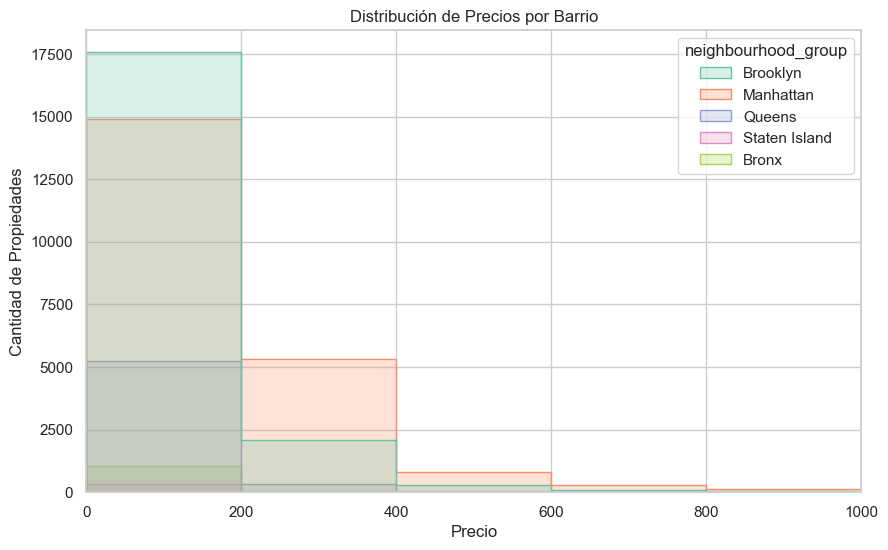

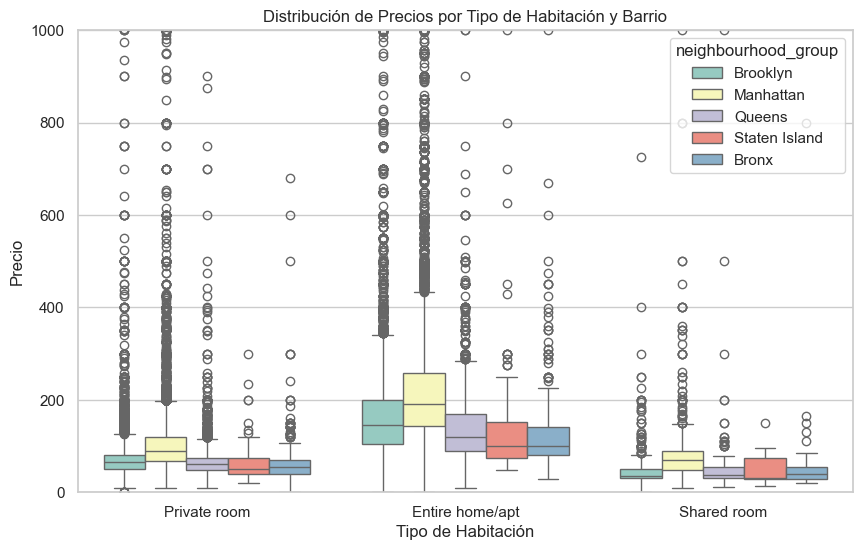

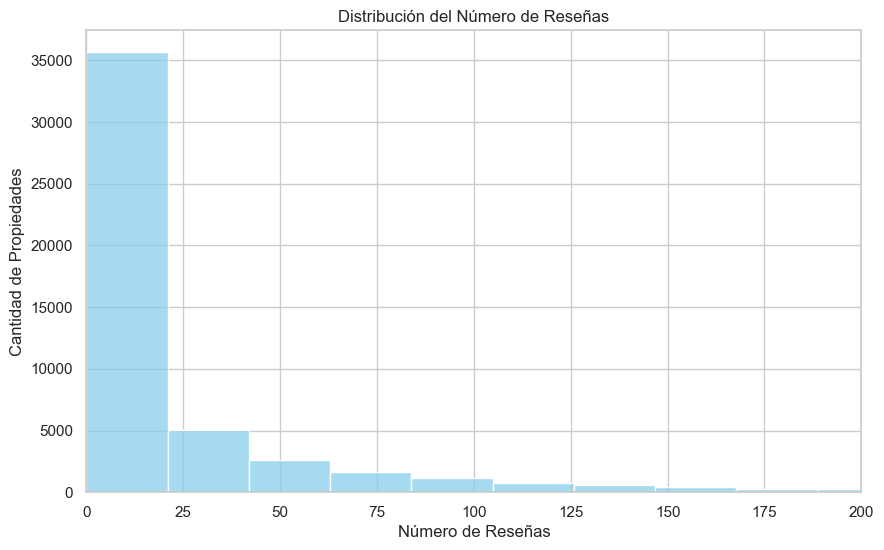

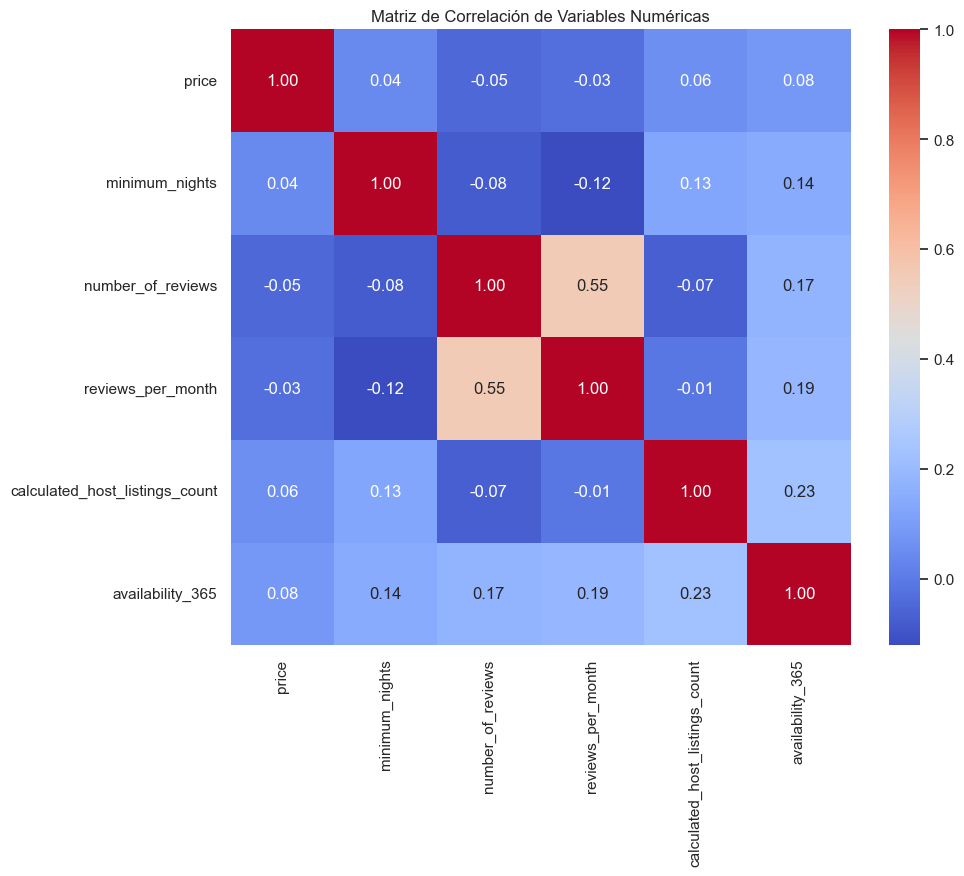

In [161]:
# Importamos las librerías necesarias
import pandas as pd                   # Para manejo de dataframes y lectura de CSV
import matplotlib.pyplot as plt       # Para crear gráficos
import seaborn as sns                 # Para gráficos estadísticos más avanzados
from tableone import TableOne         # Para crear tablas descriptivas tipo Table One

# Leemos el archivo CSV y lo convertimos en un dataframe
ruta_archivo = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\13.- Análisis exploratorio de Datos (EDA)\Data\AB_NYC_2019.csv\AB_NYC_2019.csv"
df = pd.read_csv(ruta_archivo)

# Exploramos las primeras filas para ver la estructura del dataframe
print(df.head())  # Muestra las primeras 5 filas

# Información general del dataframe: tipos de variables y valores no nulos
print(df.info())  

# Conteo de valores nulos por columna
print(df.isnull().sum())  

# Seleccionamos las columnas que queremos analizar
columnas = [
    "neighbourhood_group",  # Grupo de barrios (categoría)
    "neighbourhood",        # Nombre del barrio (categoría)
    "room_type",            # Tipo de habitación (categoría)
    "price",                # Precio por noche (numérico)
    "minimum_nights",       # Noches mínimas por reserva (numérico)
    "number_of_reviews",    # Número de reseñas (numérico)
    "reviews_per_month",    # Reseñas por mes (numérico)
    "calculated_host_listings_count",  # Propiedades por host (numérico)
    "availability_365"      # Disponibilidad en días del año (numérico)
]

# Identificamos las variables categóricas
categorical = ["neighbourhood_group", "neighbourhood", "room_type"]

# Creamos la Table One agrupando por 'neighbourhood_group'
tabla1 = TableOne(
    df,                      # Dataframe de entrada
    columns=columnas,        # Columnas a incluir
    categorical=categorical, # Variables categóricas
    groupby="neighbourhood_group",  # Agrupación por barrio principal
    missing=True,            # Incluye conteo de valores faltantes
    nonnormal=[
        "price", "minimum_nights", "number_of_reviews", 
        "reviews_per_month", "calculated_host_listings_count", "availability_365"
    ]  # Variables numéricas no normales se muestran con medianas y rangos intercuartílicos
)

# Mostramos la tabla descriptiva
print(tabla1)

# ---------------------------
# Visualizaciones básicas
# ---------------------------

# Histograma de precios por tipo de barrio
plt.figure(figsize=(10,6))               # Tamaño del gráfico
sns.histplot(data=df, x="price", bins=50, hue="neighbourhood_group", element="step", palette="Set2")  
# histplot: genera histograma
# bins=50: cantidad de intervalos
# hue: colorea por barrio
# element="step": bordes en escalera para ver mejor la distribución
# palette="Set2": colores para cada grupo
plt.title("Distribución de Precios por Barrio")  # Título
plt.xlabel("Precio")                            # Etiqueta eje X
plt.ylabel("Cantidad de Propiedades")          # Etiqueta eje Y
plt.xlim(0, 1000)                              # Limite de eje X para eliminar outliers extremos
plt.show()

# Boxplot de precio por tipo de habitación y barrio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="room_type", y="price", hue="neighbourhood_group", palette="Set3")
# boxplot: muestra mediana, cuartiles y outliers
plt.ylim(0, 1000)               # Limite de eje Y para mejor visualización
plt.title("Distribución de Precios por Tipo de Habitación y Barrio")
plt.xlabel("Tipo de Habitación")
plt.ylabel("Precio")
plt.show()

# Histograma de número de reseñas
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="number_of_reviews", bins=30, kde=False, color="skyblue")
plt.title("Distribución del Número de Reseñas")
plt.xlabel("Número de Reseñas")
plt.ylabel("Cantidad de Propiedades")
plt.xlim(0, 200)  # Limitamos eje X para visualizar mejor la mayoría de los datos
plt.show()

# Correlación entre variables numéricas
numericas = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", 
             "calculated_host_listings_count", "availability_365"]
plt.figure(figsize=(10,8))
sns.heatmap(df[numericas].corr(), annot=True, cmap="coolwarm", fmt=".2f")
# heatmap: mapa de calor de correlaciones
# annot=True: muestra valores dentro del mapa
# cmap: paleta de colores
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()